# GE

---

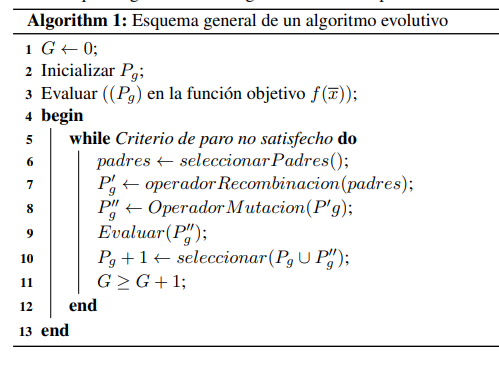

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## Rosenbrock

In [2]:
def rosenbrock(x):
    dimension = len(x)
    if dimension < 2:
        raise ValueError("La función de Rosenbrock requiere al menos dos dimensiones.")

    result = 0
    for i in range(dimension - 1):
        result += 100 * (x[i + 1] - x[i]**2)**2 + (1 - x[i])**2

    return result

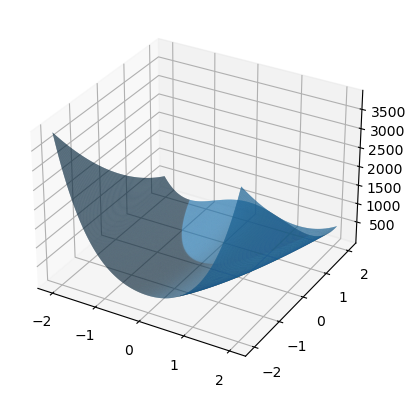

In [3]:
X = np.linspace(-2.048, 2.048, 400)
Y = np.linspace(-2.048, 2.048, 400)
X, Y = np.meshgrid(X,Y)
Z = rosenbrock([X,Y])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, linewidth=0.08,
  antialiased=True)
plt.show()

## Ackley

In [4]:
def ackley(x):
    n = len(x)
    sum_sq = 0
    cos_term = 0
    for i in range(n):
      sum_sq += x[i]**2
      cos_term += np.cos(2 * np.pi * x[i])
    return -20 * np.exp(-0.2 * np.sqrt(sum_sq / n)) - np.exp(cos_term / n) + 20 + np.exp(1)

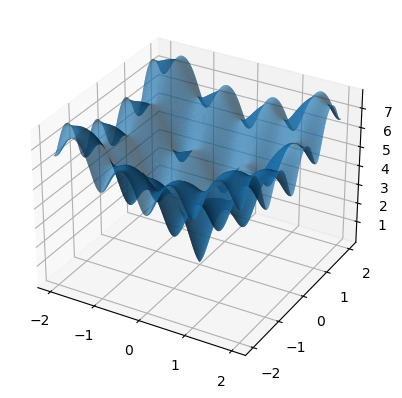

In [5]:
X = np.linspace(-2, 2, 400)
Y = np.linspace(-2, 2, 400)
X, Y = np.meshgrid(X, Y)
Z = ackley([X,Y])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, linewidth=0.08,
  antialiased=True)

plt.show()

## GE

In [6]:
import random
from operator import itemgetter
from statistics import mean 
import matplotlib.pyplot as plt


In [76]:
def grafica(mejores, peores, promedio, generaciones):
    x = list(range(1, generaciones+1))

    plt.scatter(x, mejores, color='green', label='mejor')
    plt.plot(x, mejores, color='green')
    plt.scatter(x, peores, color='red', label='peor')
    plt.plot(x, peores, color='red')
    plt.scatter(x, promedio, color='blue', label='promedio')
    plt.plot(x, promedio, color='blue')
    plt.legend()
    plt.xlabel('Generaciones')
    plt.ylabel('Aptitud')
    plt.title("Grafica de convergencia")
    plt.show()
  

In [77]:
def poblacionInicial(tam, numVar, limInf, limSup):
  poblacion = []
  for i in range(0, tam): 
    X = []
    for j in range(0, numVar):
      X.append(random.uniform(limInf[j], limSup[j]))
   
    fx = calculaAptitud(X)
    poblacion.append([X, fx])
  return poblacion

def calculaAptitud(X):
  return fun1(X[0], X[1])

# cambiar por torneo binario o ruleta
def defineParejas(tamPop):
  indices = list(range(0, tamPop))
  random.shuffle(indices)
  print(indices)
  return indices

#cruza simple de 1 punto
def cruza(p1, p2):
  h1 = [p1[0], p2[1]]
  h2 = [p2[0], p1[1]]
  return h1, h2

#crea poblacion de descendientes
def creaHijos(pCruza, indices, padres, tamPob):
  hijos = []
  j = 0
  while j < tamPob:
    if random.uniform(0,1) <= pCruza:
      p1 = padres[indices[j]][0]
      p2 = padres[indices[j+1]][0]
      #print("padre1",p1)
      #print("padre2",p2)
      h1, h2 = cruza(p1, p2)
      #print("hijo1", h1)
      #print("hijo2", h2)
      hijos.append(h1)
      hijos.append(h2)
    j += 2
  return hijos
  

def mutacion(cromosoma, delta, porcMuta):
  nuevo_crom =[]
  for gen in cromosoma:
    if random.uniform(0,1) <= porcMuta:
      if random.uniform(0,1) <= 0.5:
        gen += delta
      else:
        gen -= delta
    nuevo_crom.append(gen)
  return nuevo_crom


def algoritmoGenetico(nVariables, limInf, limSup, tamPoblacion, porcCruza, porcMuta, generaciones):
  #genera poblacion inicial 
  padres = poblacionInicial(tamPoblacion, nVariables, limInf, limSup)
#   print("Poblacion inicial ", padres)
#   print("===========================")
  mejores = []
  peores = []
  promedio = []
  #repite mientras no se alcance criterio de paro
  for i in range(0, generaciones):
    #crea parejas de padres
    indices = defineParejas(tamPoblacion)
    print("Parejas", indices)
    #aplica operador de cruza por cada pareja (para generar hijos)
    hijos = creaHijos(porcCruza, indices, padres, tamPoblacion)
    #print("longitud de hijos", len(hijos))
    #print(hijos)

    #aplica operador de mutacion 
    hijos2 = []
    for hijo in hijos:
      mutado = mutacion(hijo, 0.1, porcMuta)
      hijos2.append([mutado, calculaAptitud(mutado)])
    #print("hijos mutados", hijos2)
  
    #unir padres y descendientes 
    nuevaPoblacion = padres + hijos2
#     print("longitud de padres e hijos", len(nuevaPoblacion))
    print("nueva poblacion", nuevaPoblacion)
  
    #selecciona los sobrevivientes
    sobrevivientes = sorted(nuevaPoblacion, key=itemgetter(1), reverse = True)
    print("ordenada", sobrevivientes)
    padres = sobrevivientes[0: tamPoblacion]
    print("nuevos padres (sobrevivientes)", padres)
    #registra los valores del mejor y peor individuo por generación
    mejores.append(padres[0][1])
    peores.append(padres[-1][1])
    #calcula la aptitud promedio de la población en cada generación
    prom = 0
    for p in padres:
      prom += p[1]
    promedio.append(prom/len(padres))

  print("mejor solucion", padres[0])
  #print("MEJORES", mejores)
  #print("PEORES", peores)
  #print("PROMEDIO", promedio)

  return mejores, peores, promedio

28.804735646383143
[0, 0] [20, 20] 30


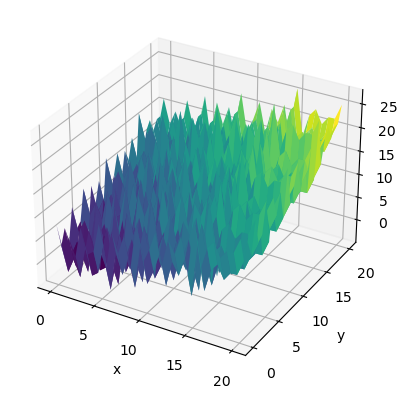

In [78]:
#funciones de prueba
import math
import numpy as np
import matplotlib.pyplot as plt

def fun1(x1, x2):
	#Maximize
	#ranges x1 = [ 0, 20] x2 = [0, 20]
	#optimal value x* = 17.5439, 17.5439 f(x*) = 28.804736
	return (x1 + 5*np.sin(3*x1) + 8*np.cos(5*x1) + x2 + 5*np.sin(3*x2) + 8*np.cos(5*x2))/2


def plotFunction(limInf, limSup, n):
  print(limInf, limSup, n)
  x1 = np.linspace(limInf[0], limSup[0], n)
  x2 = np.linspace(limInf[1], limSup[1], n)
  X, Y = np.meshgrid(x1, x2)
  FX = fun1(X, Y)

  fig = plt.figure()
  ax = plt.axes(projection='3d')
  #ax.contour3D(X, Y, FX, 50, cmap='binary')
  ax.plot_surface(X, Y, FX, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
  ax.set_xlabel('x')
  ax.set_ylabel('y')
  ax.set_zlabel('z')

  

if __name__ == "__main__":
  #evalua valores en las funciones de prueba
  print(fun1(17.5439, 17.5439))

  #grafica la función de prueba
  plotFunction([0,0], [20,20], 30)

[2, 3, 4, 0, 5, 1]
Parejas [2, 3, 4, 0, 5, 1]
nueva poblacion [[[1.0472719770188865, 1.7437335504526463], -1.818355554608627], [[8.144835273407967, 2.154004698768781], -0.8805007967803697], [[18.02397755903389, 0.7630733220464481], 4.400257947461849], [[10.724040800678537, 6.643953970193596], 7.773732605255315], [[17.041732378587373, 3.1932479344393983], 4.052237563520226], [[6.744333142185511, 6.6759278925791055], 7.262489465257669], [[18.02397755903389, 6.743953970193596], 8.4136500551088], [[10.724040800678537, 0.6630733220464481], 1.844028682924049], [[17.041732378587373, 1.7437335504526463], 2.3660837519944726], [[1.0472719770188865, 3.1932479344393983], -0.1322017430828737], [[6.84433314218551, 2.154004698768781], 2.7569264310839943], [[8.144835273407967, 6.6759278925791055], 2.608626984777329]]
ordenada [[[18.02397755903389, 6.743953970193596], 8.4136500551088], [[10.724040800678537, 6.643953970193596], 7.773732605255315], [[6.744333142185511, 6.6759278925791055], 7.262489465257

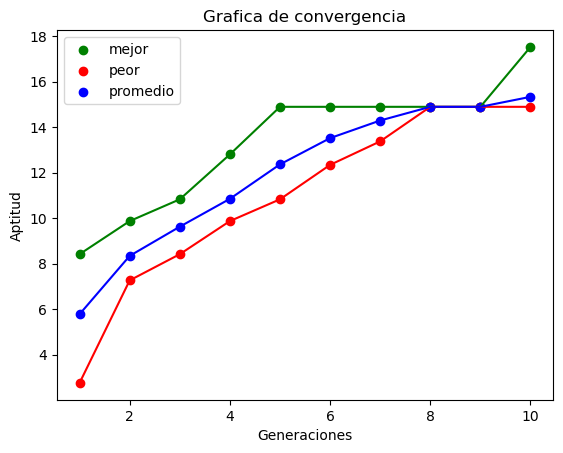

In [79]:
#parametros de entrada
nVariables = 2
limInf=[0,0]
limSup=[20,20]
# el tamaño de la población debe ser un numero par
tamPoblacion = 6
porcCruza = 0.9
porcMuta = 0.2
generaciones = 10

random.seed(123)
mejores, peores, promedio = algoritmoGenetico(nVariables, limInf, limSup, tamPoblacion, porcCruza, porcMuta, generaciones)
grafica(mejores, peores, promedio, generaciones)

In [199]:
def initPoblation(totalPoblation, nVariables, lowerLimit, upperLimit, costFunction, nDecimals):
    poblation = []
    for i in range(0, totalPoblation): 
        gen = []
        for j in range(0, nVariables):
          gen.append(round(random.uniform(limInf[j], limSup[j]), nDecimals))

        fx = costFunction(gen)
        poblation.append([gen, 1/fx])    

    return poblation



def selectParents(parents, totalPoblation):
    # Universal Estocastica 
    ptr = random.random()  # 0 - 1
    indexes = []
    addition = 0
    
    aptitudAverage = 0 
    for parent in parents:
        aptitudAverage += parent[1]
        
    aptitudAverage = aptitudAverage / totalPoblation
    
    for i in range(totalPoblation):
        ve = parents[i][1] / aptitudAverage
        addition += ve
        
        if ptr < addition:
            indexes.append(i)
        
        
        ptr += 1
    
    return indexes


def bin2Decimal(binary, lowerLimmit, nDecimals):
    aux = int(binary,2)
    return lowerLimmit + (aux / 10 ** nDecimals)


def decimal2Bin(number, lowerLimmit, nDecimals):

    auxiliar = (number - lowerLimmit) * 10 ** nDecimals


    return bin(int(auxiliar))
    


#cruza simple de 1 punto
def cross2PointsBin(parent1, parent2, lowerLimmits, nDecimals):
    children1 = []
    children2 = []
    
    
    for i in range(len(parent1)):
        
        genoma1 = decimal2Bin(parent1[i], lowerLimmits[i], nDecimals)[2:]
        genoma2 = decimal2Bin(parent2[i], lowerLimmits[i], nDecimals)[2:]
                
        size = len(genoma1) - 1
        
        
        point1 = random.randint(0, size )
        point2 = random.randint(0, size )
        
        while point1 > point2:
            point1 = random.randint(0, size )
            point2 = random.randint(0, size )
#         print("PUNTOS:")
#         print(point1)
#         print(point2)
        
        newGen2 = genoma1[:point1] + genoma2[point1:point2] + genoma1[point2:]
        newGen1 = genoma2[:point1] + genoma1[point1:point2] + genoma2[point2:]
        
        children1.append(bin2Decimal(newGen1, lowerLimmits[i], nDecimals))
        children2.append(bin2Decimal(newGen2, lowerLimmits[i], nDecimals))
    
    return children1, children2

#crea poblacion de descendientes
def createChildren(parents, indexedParents, crossRate, lowerLim, nDecimals):
    children = []
    j = 0
    while j < len(indexedParents) -1 and len(indexedParents) > 1:
        if random.uniform(0,1) <= crossRate:
            
            parent1 = parents[indexedParents[j]][0]
            parent2 = parents[indexedParents[j+1]][0]
            #print("padre1",p1)
            #print("padre2",p2)
            child1, child2 = cross2PointsBin(parent1, parent2, lowerLim, nDecimals)
            #print("hijo1", h1)
            #print("hijo2", h2)
            children.append(child1)
            children.append(child2)
        j += 2
        
#     print(children)
    return children
  

def mutationBin(gens, delta, mutationRate, lowerLimmit, nDecimals):
    newGen =[]
    i = 0
    for gen in gens:
        genoma = gen
        if random.uniform(0,1) <= mutationRate:
            
            genoma = decimal2Bin(gen, lowerLimmit[i], nDecimals)[2:]
            newGenoma = ""
#             print(genoma)
            for alelo in genoma:
                if random.uniform(0,1) <= 0.5:
#                     No change
                    newGenoma += alelo
                else:
#             Change into 0 or 1 depends

                    newGenoma += "0" if alelo == '1' else '1'

            genoma = bin2Decimal(newGenoma, lowerLimmit[i], nDecimals)
                

        i += 1
        newGen.append(genoma)
        
    return newGen
    
def mutation(gens, delta, mutationRate):
    newGen =[]
    for gen in gens:
        if random.uniform(0,1) <= mutationRate:
            if random.uniform(0,1) <= 0.5:
                gen += delta
            else:
                gen -= delta
                
        newGen.append(gen)
        
    return newGen

def validateBounds(child ,lowerLimmits, upperLimmits, nDecimals):
    newChild = []

    for i in range(len(child)):
        if child[i] < lowerLimmits[i] or child[i] > upperLimmits[i]:

            newChild.append(round(random.uniform(lowerLimmits[i], upperLimmits[i]), nDecimals))
        else:
            
            newChild.append(child[i])

    return newChild
            

def GEbin(lowerLimit, upperLimit, totalPoblation, crossRate, mutationRate, generations, costFunction, deltaMutation, epsilon):
    if len(limInf) != len(limSup):
        print("Limits are not of the same Len")
        return -1
    nDecimals = 2
    nVariables = len(limInf)
    
    parents = initPoblation(totalPoblation, nVariables, lowerLimit, upperLimit, costFunction, nDecimals)
    
    best = []
    worst = []
    average = []
    
    for i in range(generations):
            
#         print("====================================================================")
#         print(f"============ Generacion: {i + 1}===================================")  
#         print("====================================================================")
        
#         print("Padres: ", parents)
        

#         to do
        indexedParents = selectParents(parents, totalPoblation)
#         print("Padres indexados :b", indexedParents)
        
        children = createChildren(parents, indexedParents, crossRate, lowerLimit, nDecimals)
        
        
        children2 = []
        
        for child in children:
            
            newChild = mutationBin(child, deltaMutation, mutationRate, lowerLimit, nDecimals)
#             newChild = mutation(child, deltaMutation, mutationRate)

            newChild = validateBounds(newChild, lowerLimit, upperLimit, nDecimals)
            children2.append([newChild, 1/costFunction(newChild)])
            
            
            
        
#         print("Ninos: ", children2)
    
        newPoblation = parents + children2
        
        survivals = sorted(newPoblation, key=itemgetter(1), reverse = False)
        
#         print("Nueva poblacionsl", newPoblation)
        parents = survivals[0: totalPoblation]
        
#         print("Ordenada de sobrevivientes: ", survivals)
        
    
    
    #     Metrics
        best.append(parents[0][1])
        worst.append(parents[-1][1])

        prom = 0
        for parent in parents:
          prom += parent[1]

        average.append(prom/len(parents))
        
#         print("mejor solucion ;c", parents[0])
        
#        First stop Condition
#         if abs(best[-1] - BESTKNOWVALUE]) <= epsilon:
#                 break
        
#         Second Stop Condition:
        if abs(best[-1] - worst[-1]) <= epsilon:
            print("\n\n-----------------------------------------------------")
            print("There is no diversification")
            break
        
    
    



 
    return best, worst, average



-----------------------------------------------------
There is no diversification


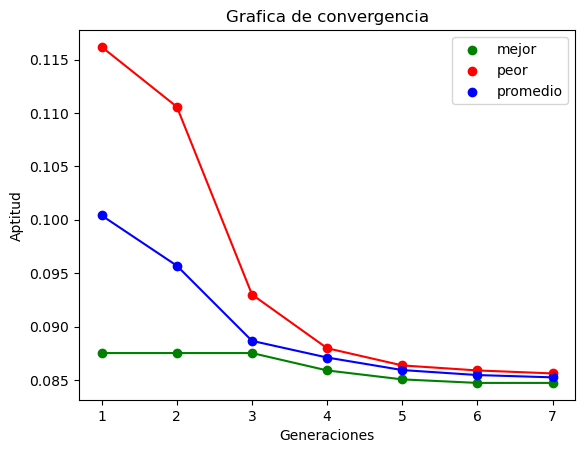

Mejor:  0.08752375874169405


In [202]:

#parametros de entrada
nVariables = 2
limInf=[0,0]
limSup=[5,5]
# el tamaño de la población debe ser un numero par
tamPoblacion = 6
porcCruza = 0.9
porcMuta = 0.2
generaciones = 100
deltaMutation = 0.1

epsilon = 0.001

random.seed(123)
mejores, peores, promedio = GEbin(limInf, limSup, tamPoblacion, porcCruza, porcMuta, generaciones, ackley, deltaMutation, epsilon)

grafica(mejores, peores, promedio, len(mejores))

print("Mejor: ", max(mejores))

## TESTS:

In [175]:
seeds = [2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71]



-----------------------------------------------------
There is no diversification


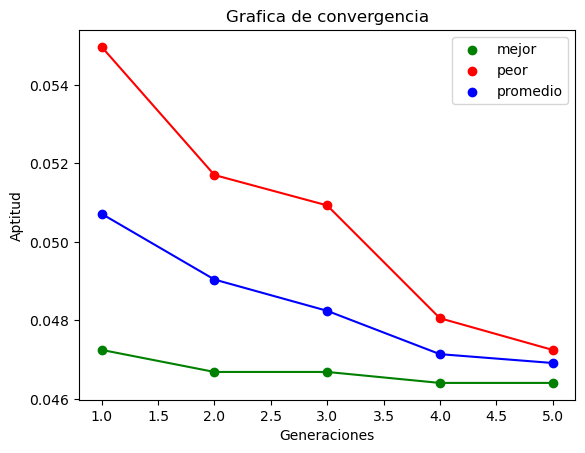



-----------------------------------------------------
There is no diversification


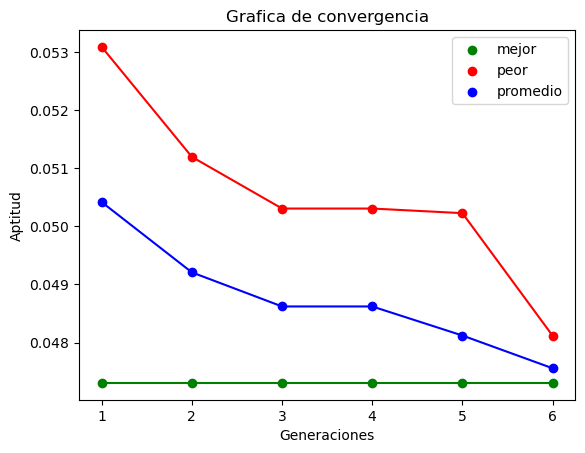



-----------------------------------------------------
There is no diversification


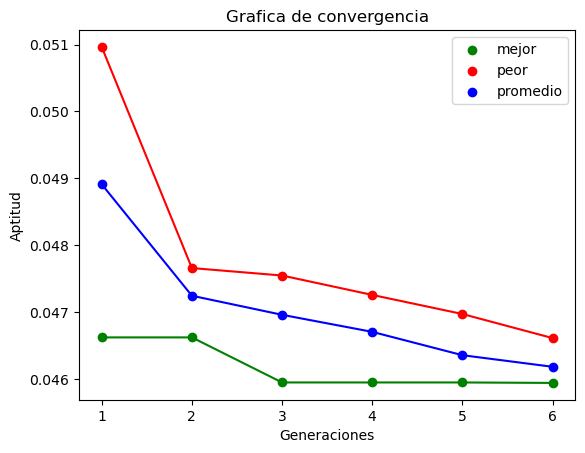



-----------------------------------------------------
There is no diversification


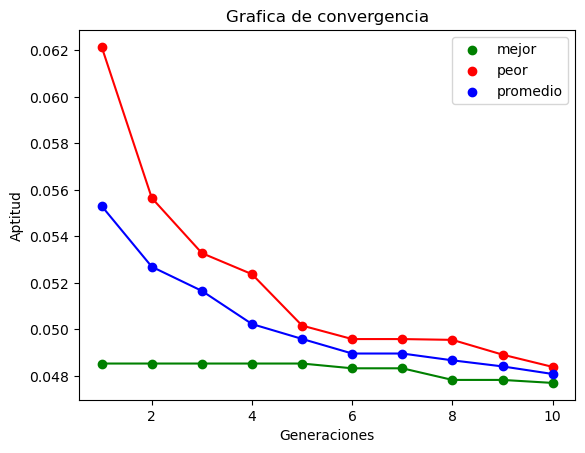



-----------------------------------------------------
There is no diversification


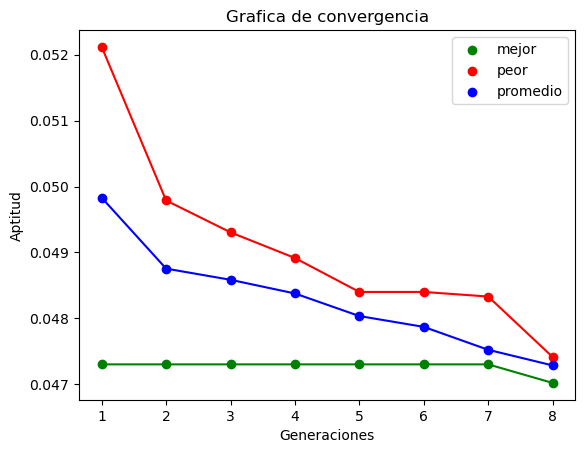



-----------------------------------------------------
There is no diversification


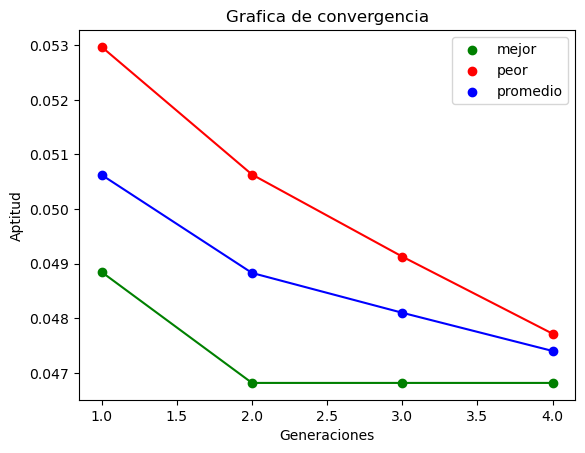



-----------------------------------------------------
There is no diversification


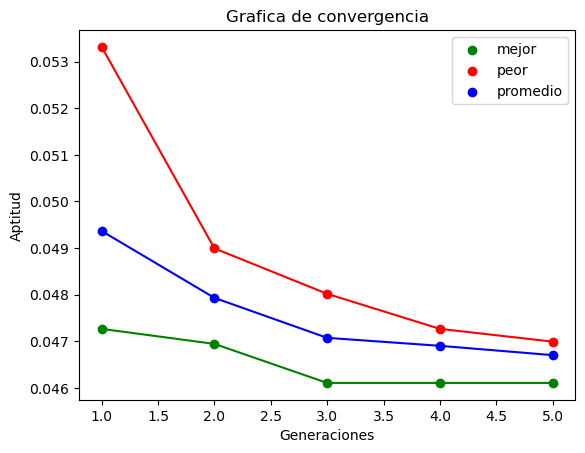



-----------------------------------------------------
There is no diversification


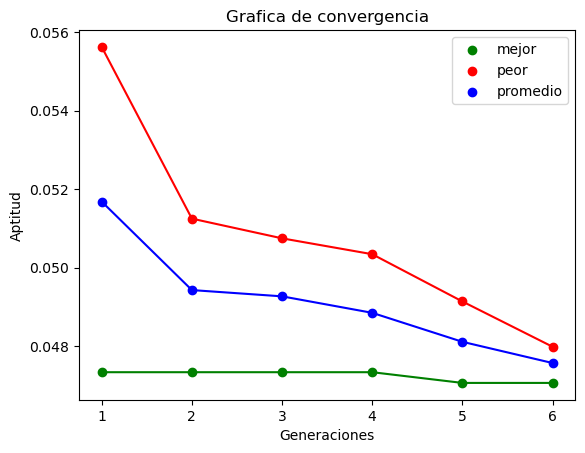



-----------------------------------------------------
There is no diversification


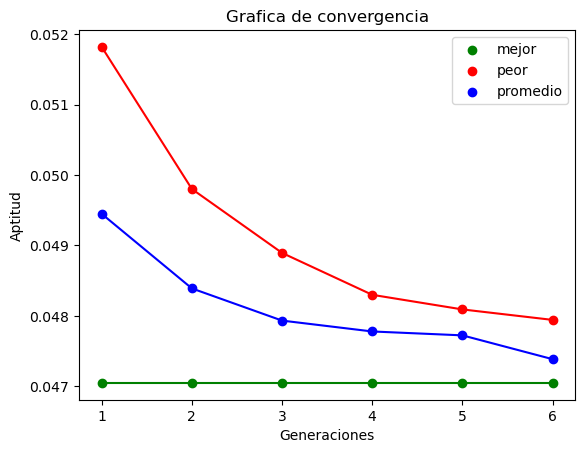



-----------------------------------------------------
There is no diversification


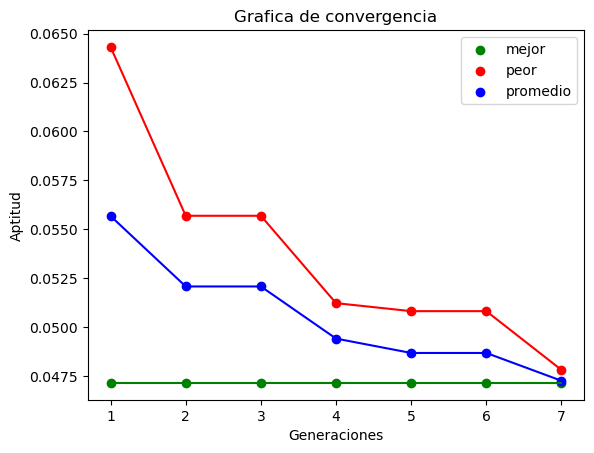



-----------------------------------------------------
There is no diversification


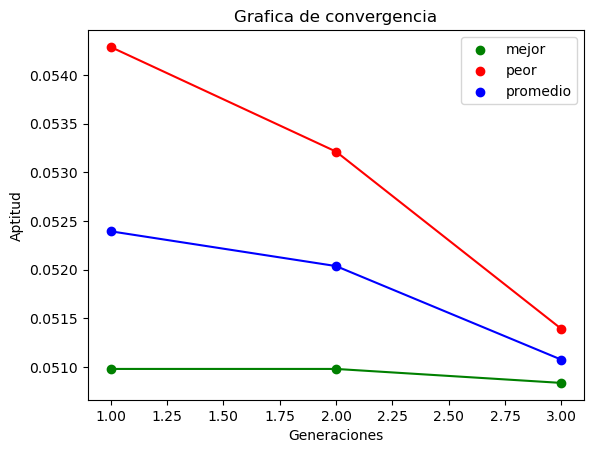



-----------------------------------------------------
There is no diversification


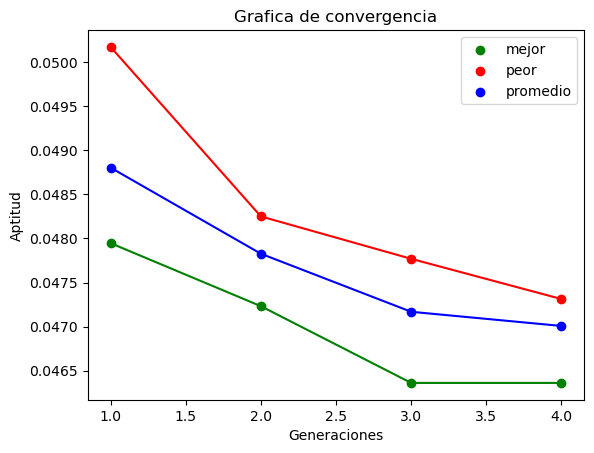



-----------------------------------------------------
There is no diversification


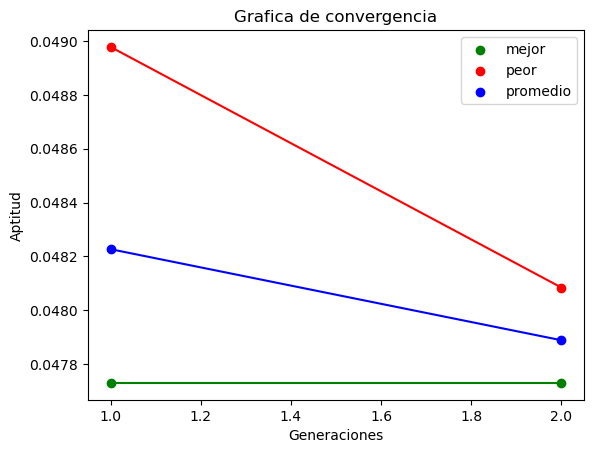



-----------------------------------------------------
There is no diversification


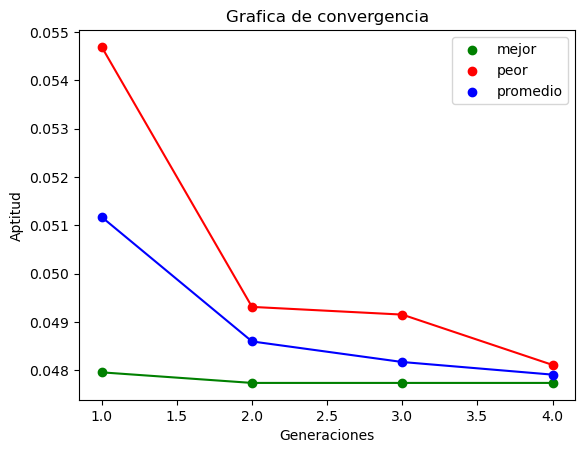



-----------------------------------------------------
There is no diversification


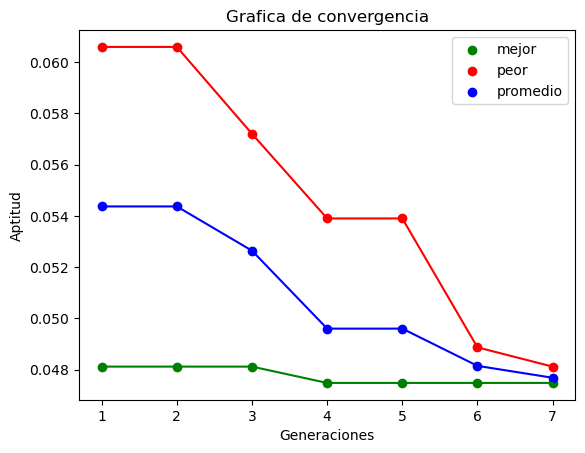



-----------------------------------------------------
There is no diversification


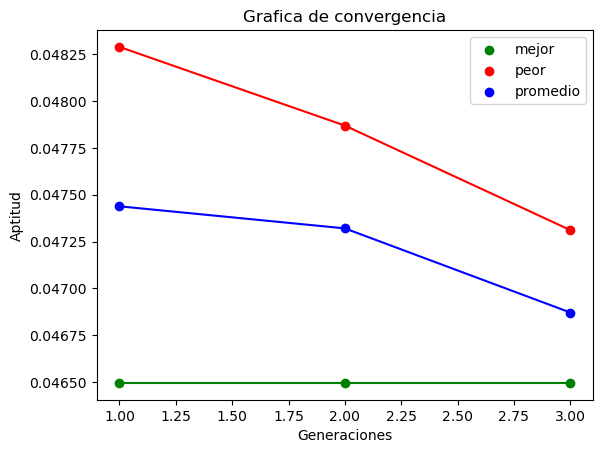



-----------------------------------------------------
There is no diversification


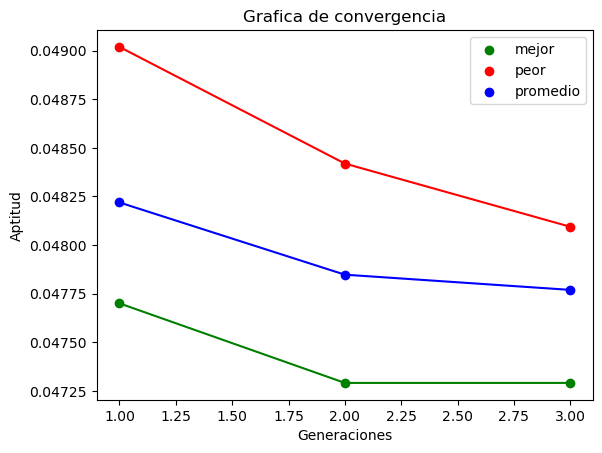



-----------------------------------------------------
There is no diversification


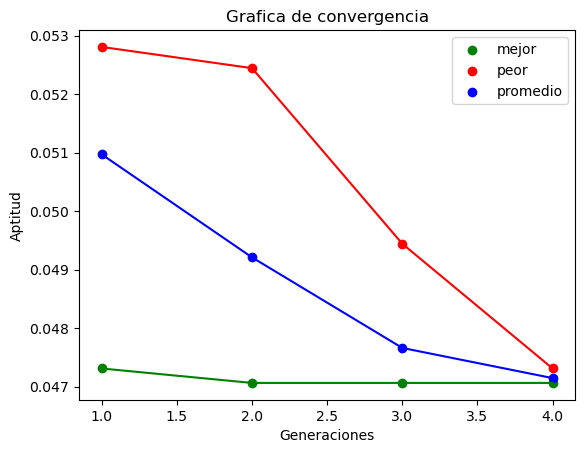



-----------------------------------------------------
There is no diversification


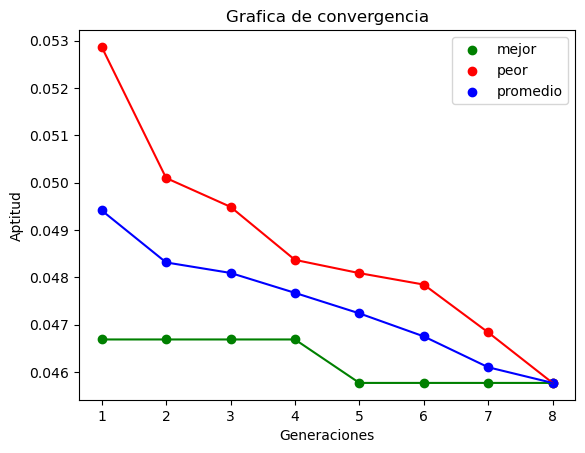



-----------------------------------------------------
There is no diversification


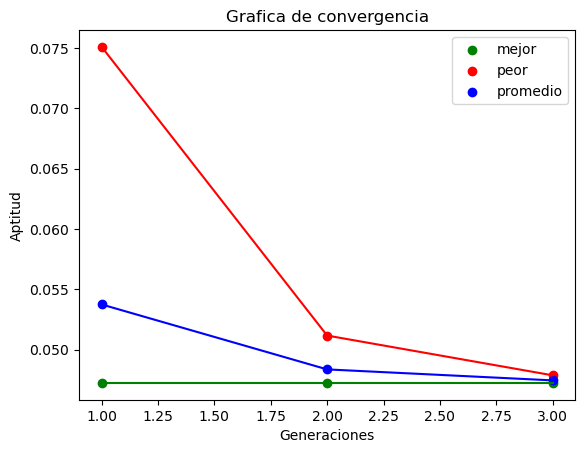

Se perdio al diversificacion con:  20
Maximo encontrado:  0.04649645168476154
Minimo encontrado: 0.051390741961053574
Desviacion estandar:  0.000963659765526046
Promedio:  0.047641138185911217


In [205]:
#parametros de entrada
nVariables = 2
limInf=[0,0]
limSup=[20,20]
# el tamaño de la población debe ser un numero par
tamPoblacion = 6
porcCruza = 0.9
porcMuta = 0.2
generaciones = 100
deltaMutation = 0.1
epsilon = 0.001

# Metricas sobre las metricas
perdieronDiversificacion = 0
promedio = 0
valoresOptimos = []
peoresOptimos = []


for seed in seeds:
    random.seed(seed)
    mejores, peores, promedio = GEbin(limInf, limSup, tamPoblacion, porcCruza, porcMuta, generaciones, ackley, deltaMutation, epsilon)
    grafica(mejores, peores, promedio, len(mejores))
    
    if len(mejores) < generaciones:
        perdieronDiversificacion += 1
    
    valoresOptimos.append(max(mejores))
    peoresOptimos.append(min(peores))
    
print("Se perdio al diversificacion con: ", perdieronDiversificacion)
print("Maximo encontrado: ", min(valoresOptimos))
print("Minimo encontrado:", max(peoresOptimos))
print("Desviacion estandar: ", np.std(valoresOptimos))
print("Promedio: ", np.mean(valoresOptimos))